# Aula 20 - feature engineering e oversample no projeto final

Vamos explorar algumas das técnicas apresentadas no fim da Aula 13, aplicando-as ao dataset do projeto final!

In [1]:
# recarregar automaticamente as alterações que fizermos no .py
%load_ext autoreload
%autoreload 2

In [2]:
from projeto_utils import *

______________

In [3]:
X_train, X_val, y_train, y_val = read_tts_projeto()

In [4]:
df_test = pd.read_csv("../datasets/application_test_student.csv")

X_test = df_test.drop(columns=["SK_ID_CURR"])

## Feature engineering

**Taxas relacionadas à receita**


In [9]:
X_train["AMT_CREDIT"]/X_train["AMT_INCOME_TOTAL"]

28631      2.399077
183632     5.266667
134136     0.666667
12766      3.899315
174805    10.000000
            ...    
132533     8.985000
1407       3.330800
40785      1.497500
80125      4.844800
3211       2.949333
Length: 196806, dtype: float64

In [12]:
X_train["AMT_ANNUITY"]/X_train["AMT_INCOME_TOTAL"]

28631     0.246277
183632    0.296500
134136    0.052667
12766     0.199589
174805    0.347600
            ...   
132533    0.262700
1407      0.127000
40785     0.116600
80125     0.225840
3211      0.233967
Length: 196806, dtype: float64

In [13]:
X_train["AMT_GOODS_PRICE"] / X_train["AMT_INCOME_TOTAL"]

28631      2.307692
183632     4.166667
134136     0.666667
12766      3.424658
174805    10.000000
            ...    
132533     7.500000
1407       2.750000
40785      1.250000
80125      4.000000
3211       2.333333
Length: 196806, dtype: float64

In [11]:
X_train["AMT_INCOME_TOTAL"] / X_train["CNT_FAM_MEMBERS"]

28631     97500.0
183632    18000.0
134136    67500.0
12766     87600.0
174805    60000.0
           ...   
132533    90000.0
1407      90000.0
40785     60000.0
80125     56250.0
3211      45000.0
Length: 196806, dtype: float64

**Tempo empregado**

In [18]:
np.clip(X_train["DAYS_EMPLOYED"] / X_train["DAYS_BIRTH"], 0, 1)

28631     0.113107
183632    0.008512
134136    0.000000
12766     0.029792
174805    0.247751
            ...   
132533    0.145112
1407      0.223674
40785     0.266633
80125     0.158881
3211      0.049080
Length: 196806, dtype: float64

**Número de adultos e crianças na família**


In [19]:
X_train["CNT_FAM_MEMBERS"] - X_train["CNT_CHILDREN"]

X_train['CNT_CHILDREN'] / X_train['CNT_FAM_MEMBERS']

28631     0.333333
183632    0.666667
134136    0.000000
12766     0.333333
174805    0.333333
            ...   
132533    0.000000
1407      0.000000
40785     0.333333
80125     0.000000
3211      0.333333
Length: 196806, dtype: float64

**Quantidade de pagamentos**

In [20]:
X_train['AMT_CREDIT'] / X_train['AMT_ANNUITY']

28631      9.741379
183632    17.762788
134136    12.658228
12766     19.536719
174805    28.768700
            ...    
132533    34.202512
1407      26.226772
40785     12.843053
80125     21.452356
3211      12.605784
Length: 196806, dtype: float64

**Estatísticas sobre dados externos**


In [21]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
28631,0.862670,0.537364,0.735221
183632,NaN,0.484688,NaN
134136,0.558577,0.465365,0.380800
12766,0.330174,0.213449,0.297087
174805,0.629119,0.648341,0.506484
...,...,...,...
132533,NaN,0.162192,0.673830
1407,NaN,0.727673,0.835777
40785,NaN,0.537880,0.665855
80125,0.564393,0.443233,0.508287


In [22]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].min(axis = 1)

28631     0.537364
183632    0.484688
134136    0.380800
12766     0.213449
174805    0.506484
            ...   
132533    0.162192
1407      0.727673
40785     0.537880
80125     0.443233
3211      0.142344
Length: 196806, dtype: float64

In [24]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].max(axis = 1)

X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis = 1)

X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].std(axis = 1)

(~X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull()).astype(int).sum(axis=1)

28631     3
183632    1
134136    3
12766     3
174805    3
         ..
132533    2
1407      2
40785     2
80125     3
3211      2
Length: 196806, dtype: int64

**Número de documentos entregues**


In [25]:
[x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [27]:
features_docs = [x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

X_train[features_docs]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
28631,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183632,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12766,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174805,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132533,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40785,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80125,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
features_docs = [x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

X_train[features_docs].sum(axis = 1).value_counts()

1    172936
0     18796
2      4972
3       101
4         1
dtype: int64

**Tipo de dia da data de aplicação**


In [30]:
X_train["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: "Weekend" if x in ["SATURDAY", "SUNDAY"] else "Working day")

28631     Working day
183632        Weekend
134136        Weekend
12766     Working day
174805        Weekend
             ...     
132533        Weekend
1407          Weekend
40785     Working day
80125     Working day
3211      Working day
Name: WEEKDAY_APPR_PROCESS_START, Length: 196806, dtype: object

**Algumas outras razões temporais**

In [32]:
X_train["OWN_CAR_AGE"] / X_train["DAYS_BIRTH"]

X_train["DAYS_ID_PUBLISH"] / X_train["DAYS_BIRTH"]

X_train["DAYS_REGISTRATION"] / X_train["DAYS_BIRTH"]

28631     0.452775
183632    0.078867
134136    0.032721
12766     0.060409
174805    0.197993
            ...   
132533    0.469093
1407      0.573774
40785     0.158165
80125     0.341684
3211      0.170825
Length: 196806, dtype: float64

___________________

In [33]:
X_train.shape, X_val.shape, X_test.shape

((196806, 120), (49202, 120), (61503, 120))

In [34]:
cols_to_drop = ["CODE_GENDER"]

pipe_pre = Pipeline([("create_surname", FeaturesCreator()),
                     ("column_dropper", ColumnDropper(cols_to_drop))])

X_train, X_val, X_test, pre_processador = pipe_pre_process_projeto_with_pipe_pre(pipe_pre, X_train, X_val, X_test,
                                                                                 inputer_num_strategy="mean",
                                                                                 encoding="onehot",
                                                                                 scaler="ss")

In [35]:
X_train.shape, X_val.shape, X_test.shape

((196806, 137), (49202, 137), (61503, 137))

___________

## Pipeline com feature engineering & undersampling (ajuda a reduzir o tamanho da base)

In [40]:
y_train.value_counts(normalize=True)

0    0.918824
1    0.081176
Name: TARGET, dtype: float64

In [41]:
y_train.value_counts()

0    180830
1     15976
Name: TARGET, dtype: int64

In [44]:
f"Após o undersampling, ficaremos com {15976*2} linha na base de treino!"

'Após o undersampling, ficaremos com 31952 linha na base de treino!'

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
pipe_gb = Pipeline([("under_samp", RandomUnderSampler(sampling_strategy=0.5,
                                                      random_state=42)),
                    ("pre_processador", pre_processador),
                    ("gb", GradientBoostingClassifier(random_state=42))])

pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('under_samp',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.5)),
                ('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                               


Métricas de avaliação de treino:


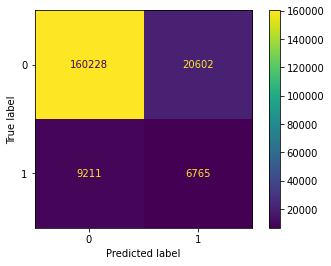

              precision    recall  f1-score   support

           0       0.95      0.89      0.91    180830
           1       0.25      0.42      0.31     15976

    accuracy                           0.85    196806
   macro avg       0.60      0.65      0.61    196806
weighted avg       0.89      0.85      0.87    196806



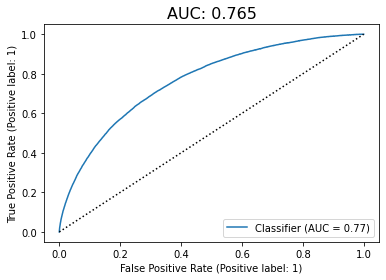


Métricas de avaliação de teste:


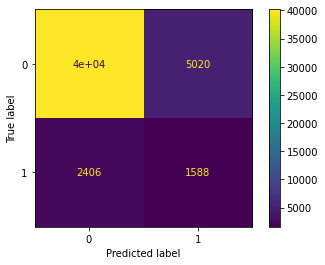

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     45208
           1       0.24      0.40      0.30      3994

    accuracy                           0.85     49202
   macro avg       0.59      0.64      0.61     49202
weighted avg       0.89      0.85      0.87     49202



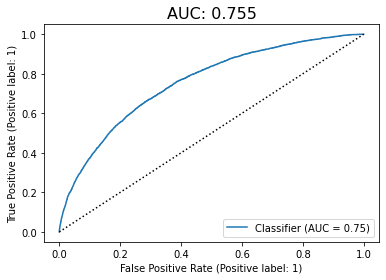

In [38]:
dados_split = (X_train, X_val, y_train, y_val)

metricas_classificacao(pipe_gb, *dados_split)

## Emulador de "modelo em produção" - base de teste

In [45]:
y_probs_test = pipe_gb.predict_proba(X_test)[:, 1]

y_pred_test = pipe_gb.predict(X_test)

In [53]:
X_test

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_MIN,EXT_SOURCE_MAX,EXT_SOURCE_MEAN,EXT_SOURCE_SD,NUM_EXT_SOURCES,NUM_DOCUMENTS,DAY_APPR_PROCESS_START,OWN_CAR_AGE_RATIO,DAYS_ID_PUBLISHED_RATIO,DAYS_REGISTRATION_RATIO
0,Cash loans,N,N,0,117000.0,417024.0,20191.5,360000.0,"Spouse, partner",Working,...,0.145543,0.484936,0.271063,0.186150,3,1,Working day,NaN,0.213695,0.211766
1,Cash loans,N,Y,0,450000.0,640080.0,31261.5,450000.0,Unaccompanied,Commercial associate,...,0.624574,0.680139,0.657922,0.029407,3,1,Working day,NaN,0.109628,0.164982
2,Revolving loans,Y,Y,0,450000.0,900000.0,45000.0,900000.0,Unaccompanied,Commercial associate,...,0.173527,0.454279,0.313903,0.198521,2,0,Weekend,-0.000221,0.089361,0.471411
3,Cash loans,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,Unaccompanied,Working,...,0.440058,0.688145,0.564101,0.175424,2,1,Working day,-0.000487,0.342154,0.998782
4,Cash loans,Y,Y,0,675000.0,835380.0,42840.0,675000.0,Unaccompanied,Working,...,0.081726,0.426409,0.254067,0.243728,2,1,Working day,-0.000591,0.279184,0.274751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,Cash loans,Y,N,0,225000.0,472500.0,46161.0,454500.0,Unaccompanied,Working,...,0.641852,0.641852,0.641852,NaN,1,1,Working day,-0.000505,0.076949,0.161980
61499,Cash loans,N,Y,0,112500.0,508495.5,24592.5,454500.0,"Spouse, partner",Pensioner,...,0.297216,0.492060,0.394638,0.137776,2,1,Working day,NaN,0.201042,0.017297
61500,Cash loans,Y,Y,0,157500.0,808650.0,23643.0,675000.0,Unaccompanied,Pensioner,...,0.596971,0.654529,0.625750,0.040700,2,1,Weekend,-0.000899,0.176077,0.512491
61501,Cash loans,N,Y,0,202500.0,590337.0,30271.5,477000.0,Unaccompanied,Commercial associate,...,0.296855,0.701696,0.499275,0.286266,2,1,Working day,NaN,0.087794,0.150226


In [50]:
pd.DataFrame({"SK_ID_CURR" : df_test["SK_ID_CURR"],
              "proba": y_probs_test})

,SK_ID_CURR,proba
0,149741,0.646420
1,363290,0.165856
2,436006,0.333876
3,377703,0.206049
4,188624,0.650230
...,...,...
61498,102817,0.250371
61499,343961,0.370276
61500,427828,0.176911
61501,405956,0.319885


In [52]:
df_test_targets = pd.read_csv("../datasets/application_test_professor_targets.csv")

df_test_targets

,SK_ID_CURR,TARGET
0,149741,1
1,363290,0
2,436006,0
3,377703,0
4,188624,0
...,...,...
61498,102817,0
61499,343961,0
61500,427828,0
61501,405956,0


In [54]:
y_test = df_test_targets["TARGET"]

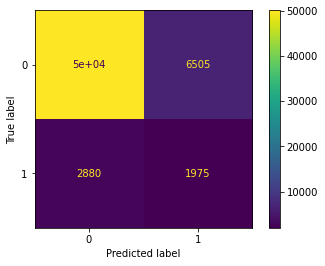

              precision    recall  f1-score   support

           0       0.95      0.89      0.91     56648
           1       0.23      0.41      0.30      4855

    accuracy                           0.85     61503
   macro avg       0.59      0.65      0.61     61503
weighted avg       0.89      0.85      0.87     61503



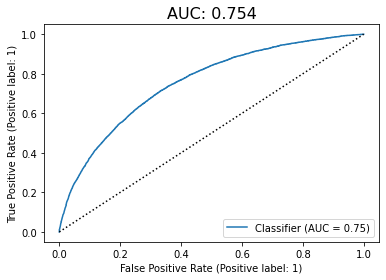

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

disp = RocCurveDisplay.from_predictions(y_test, y_probs_test)
disp.ax_.set_title(f"AUC: {roc_auc_score(y_test, y_probs_test):.3f}", fontsize=16)
x = np.linspace(0, 1, 100)
plt.plot(x, x, ls=":", color="black")
plt.show()

____
____
____